In [1]:
import pandas as pd
import pyreadr  #pip install pyreadr -q -- apply this if pyreadr is not giving Error
import matplotlib.pyplot as plt
import numpy as np
import time
import sys
from numpy import array
from numpy.linalg import pinv
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import r2_score

In [2]:
result = pyreadr.read_r(r"C:\Users\alivi\Desktop\Ali Vijdaan\Jupyter Notebooks\ES-205 Project\movies.RData") # Read .rdata file
# Extract the dataframe from the result
df = result["movies"]  # Assuming the dataframe is the first object in the RData file

# Convert the dataframe to a CSV file
csv_file_path = r"C:\Users\alivi\Desktop\Ali Vijdaan\Jupyter Notebooks\ES-205 Project\movies.csv"
df.to_csv(csv_file_path, index=False)  # Save as CSV without the index

# Display the first few rows of the CSV file
df = pd.read_csv(csv_file_path)
df.head()

,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013.0,4.0,19.0,2013.0,...,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001.0,3.0,14.0,2001.0,...,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996.0,8.0,21.0,2001.0,...,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993.0,10.0,1.0,2001.0,...,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004.0,9.0,10.0,2005.0,...,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/


In [3]:
df.head()

,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013.0,4.0,19.0,2013.0,...,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001.0,3.0,14.0,2001.0,...,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996.0,8.0,21.0,2001.0,...,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993.0,10.0,1.0,2001.0,...,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004.0,9.0,10.0,2005.0,...,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/


In [4]:
#Showing data with Selected Colomns
selected_columns = ['title', 'mpaa_rating','genre', 'critics_score', 'audience_score']
s_df = df[selected_columns] #s_df indicates selected dataframe
s_df.head(15)

,title,mpaa_rating,genre,critics_score,audience_score
0,Filly Brown,R,Drama,45.0,73.0
1,The Dish,PG-13,Drama,96.0,81.0
2,Waiting for Guffman,R,Comedy,91.0,91.0
3,The Age of Innocence,PG,Drama,80.0,76.0
4,Malevolence,R,Horror,33.0,27.0
5,Old Partner,Unrated,Documentary,91.0,86.0
6,Lady Jane,PG-13,Drama,57.0,76.0
7,Mad Dog Time,R,Drama,17.0,47.0
8,Beauty Is Embarrassing,Unrated,Documentary,90.0,89.0
9,The Snowtown Murders,Unrated,Drama,83.0,66.0


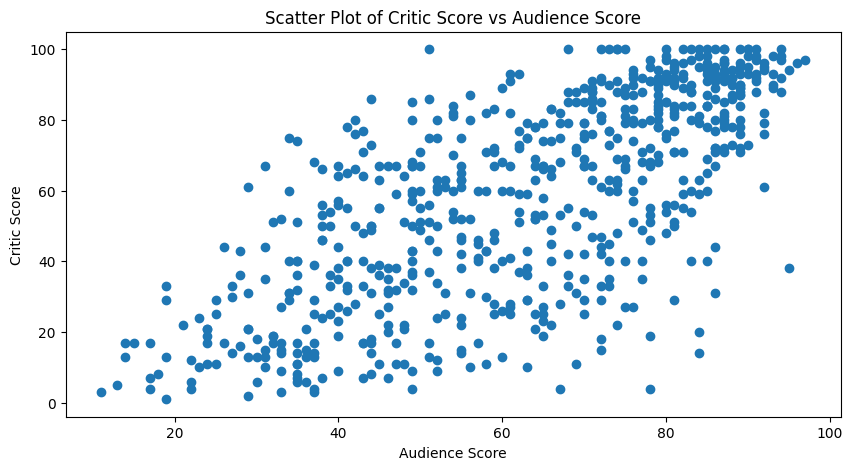

In [5]:
x = s_df['audience_score']
y = s_df['critics_score']

plt.figure(figsize=(10, 5)) #(width, height)

plt.scatter(x, y)

plt.title('Scatter Plot of Critic Score vs Audience Score')
plt.xlabel('Audience Score')
plt.ylabel('Critic Score')

plt.show()

Gradient Descent

In [6]:
def gradient_descent(x, y):
  
  m_curr = 0    #Initialzing our predictions for gradeint
  b_curr = 0    #Initialzing our predictions for y-intercept
  iterations = 100
  n = len(x)
  learning_rate = 0.001

  res_m = []
  res_b = []
  res_mse = []

  for i in range(iterations):
    y_hat = m_curr * x + b_curr  #Equation for line of predicted values

    mse = (1/n) * sum((y - y_hat)**2)
    res_mse.append(mse)

    Dm = (-2/n) * sum(x*(y - y_hat))  #Partial Derivative wrt m
    Db = (-2/n) * sum(y - y_hat)  #Partial Derivative wrt y-intercept

    #Updating m and y-intercept
    m_curr = m_curr - (learning_rate * Dm)
    res_m.append(m_curr)
    b_curr = b_curr - (learning_rate * Db)
    res_b.append(b_curr)
  
  #Printing Results
  print(f"Gradient: {m_curr}")
  print(f"Intercepts: {b_curr}")
  print(f"Mean Squared Error: {mse}")


  return res_m, res_b, res_mse, m_curr, b_curr

In [7]:
m, c, mse, grad, y_int = gradient_descent(x, y)

Gradient: -1.0740415742597546e+88
Intercepts: -1.5586461800813027e+86
Mean Squared Error: 8.593892352563279e+177


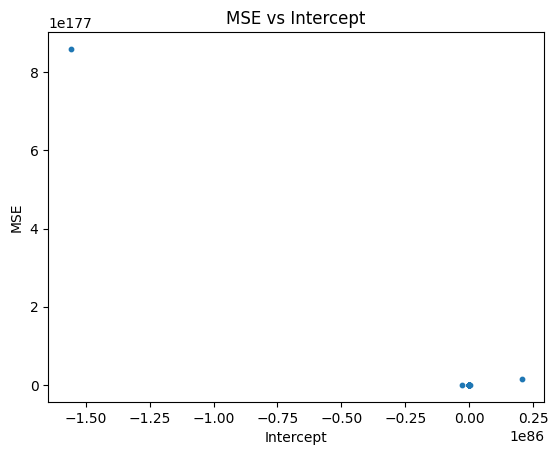

In [8]:
plt.scatter(c, mse, s = 10)

plt.title('MSE vs Intercept')
plt.xlabel('Intercept')
plt.ylabel('MSE')

plt.show()

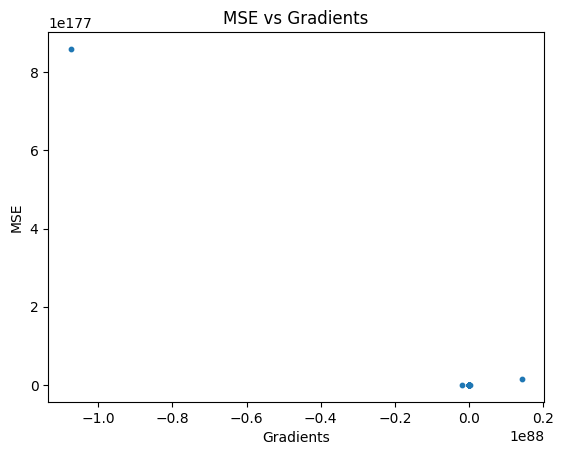

In [9]:
plt.scatter(m, mse, s = 10)

plt.title('MSE vs Gradients')
plt.xlabel('Gradients')
plt.ylabel('MSE')


plt.show()

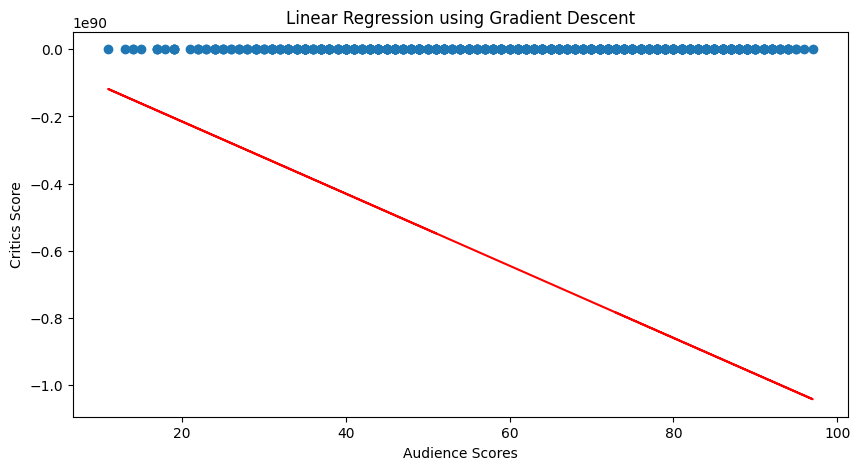

In [10]:
y_hat = grad * x + y_int

plt.figure(figsize=(10, 5)) #(width, height)
plt.scatter(x, y)
plt.plot(x, y_hat, color = 'red')

plt.title("Linear Regression using Gradient Descent")
plt.xlabel('Audience Scores')
plt.ylabel('Critics Score')

plt.show()

In [11]:

obs_val = 8.593892352563279
tru_val = 477.1002705961618

acc = 100 - abs((((obs_val - tru_val) / tru_val) * 100))
print(f"Accuracy = {acc}%")

Accuracy = 85.41011478983333%
